### To do:

Sample and fit a noisy normal distribution

1. sample randomly from a normal distribution n times (100 is a good start-but you can experiment with this)
2. jitter the samples to make it noisy
3. define objective function - use the eq of a [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution) 
4. define cost function 
5. find best fitting parameters for $\mu$ (center) and $\sigma$ (width) using grid search
6. validate your results using grid search with *scipy.optimize.minimize*
7. plot your results of fitting and compare to the non-noisy data in step 1

In [1]:
# Imports 
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import minimize
from matplotlib.pyplot import show
plt.rcParams['figure.figsize'] = [10,5]

## 1. Sample randomly from a normal distribution n times 
This method allows us to control mu and sigma but not x    
       
x = bins, y = frequency

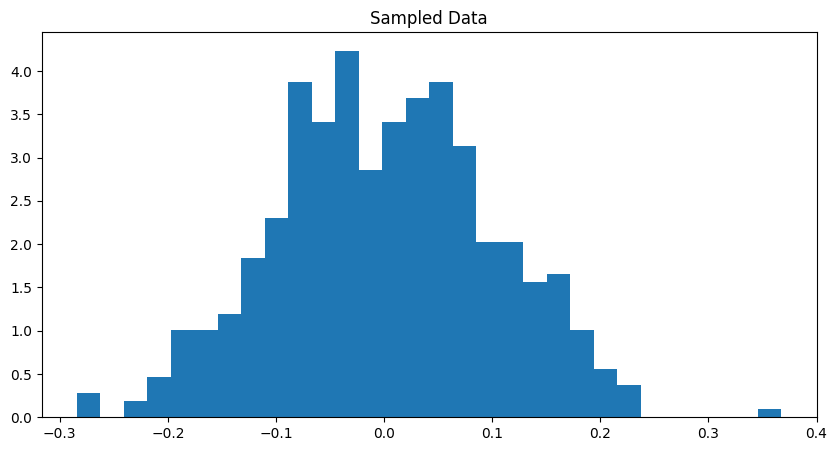

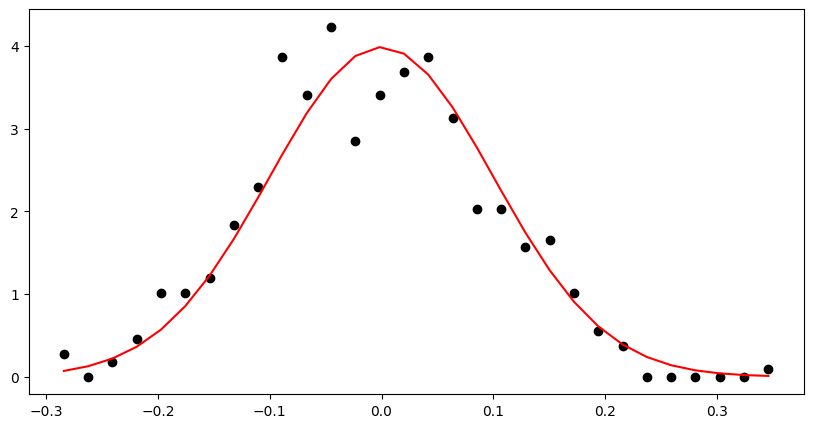

In [4]:
# Define distribution parameters 
numSamples = 500
mu = 0
sigma = 0.1

# Draw random samples from a normal distribution
samples = np.random.normal(mu,sigma,numSamples)

# Plot distribution 
count, bins, ignored = plt.hist(samples, 30, density=True)
plt.title("Sampled Data")

# Plot x
plt.figure()
plt.plot(bins[:-1], count, 'ko')

# Plot distribution samples came from to make sure its the same parameters 
y, sse = fit_gauss(bins[:-1], count, [mu,sigma], True)
plt.plot(bins[:-1], y, color='red')

## 2. Jitter the samples to make it noisy
Applying some linear computation to the original samples (i.e., original samples + random uniform noise)  

We don't need to jitter the samples because they were chosen randomly 

Instead, we use the Gaussian Equation defined below to generate data then jitter those samples

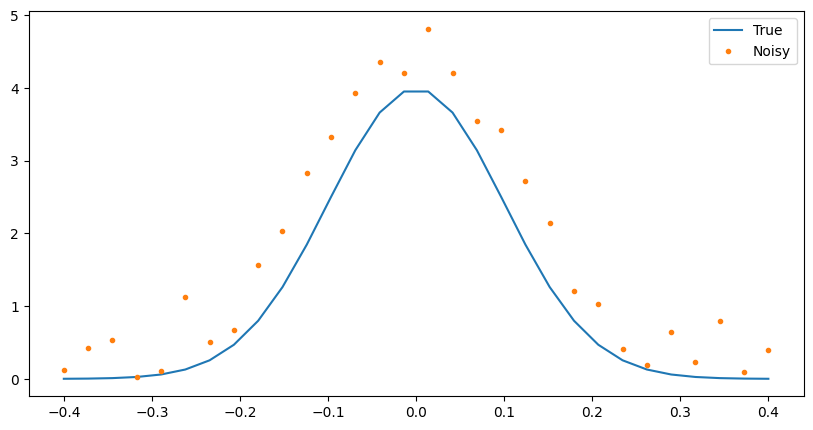

In [ ]:
n = 30
 # returns array of numSamples numbers evenly spaced between -0.4 and 0.4
x = np.linspace(-0.4, 0.4, n) 

# Get true y-values from fitting function 
y, sse = fit_gauss(x, 0, [mu,sigma], True)
plt.plot(x, y, '-', label='True')

# Jitter to make data imperfect 
noisy_y = y+np.random.rand(len(y))
plt.plot(x, noisy_y, '.', label='Noisy')
plt.legend()

## 3-4. Define objective function - use the eq of a [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution) 


In [3]:
def fit_gauss(x, data, par, flag):
    # free parameters (mu and sigma)
    mu = par[0]
    sigma = par[1]
    
    # objective function 
    fit = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
    
    # cost function 
    cost = sum(data-fit)**2
    if flag == True:
        return [fit, cost]
    else:
        return cost

## 5. Find the best fitting parameters for mu and sigma using grid search
Use nested for loops that iterate over the parameters mu and sigma and compute the cost for the function "fit_gauss" on each iteration. 

Text(0, 0.5, 'Sigma')

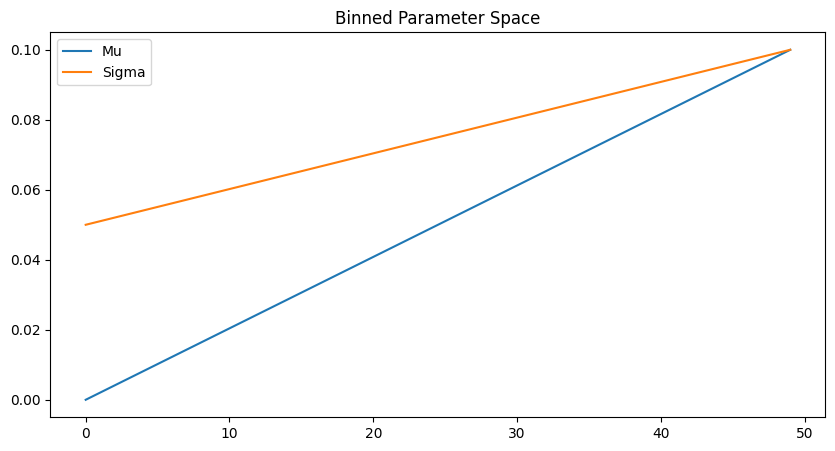

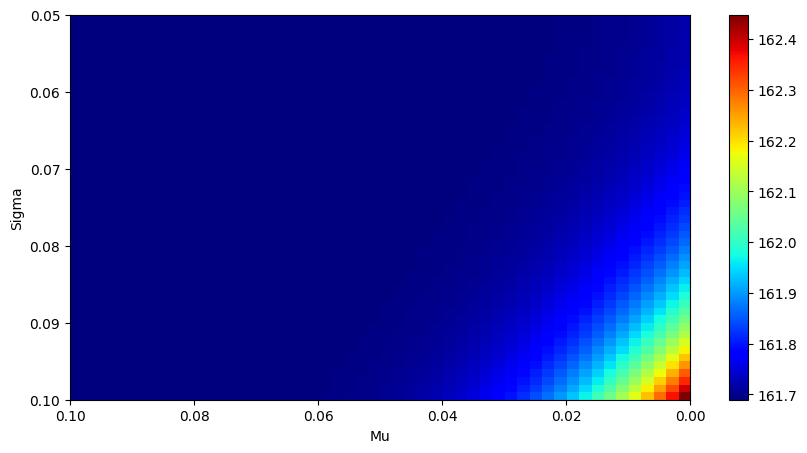

In [ ]:
# Define mu and sigma values to be tested 
mus = np.linspace(0, 0.1, 50)
sigmas = np.linspace(0.05, 0.1, 50)

# Parameter space 
plt.plot(mus, label='Mu')
plt.plot(sigmas, label='Sigma')
plt.legend()
plt.title('Binned Parameter Space')

# Determine cost for each parameter pair 
costs = np.zeros(shape=(len(mus),len(sigmas)))
for i in range(len(mus)):
    m = mus[i]
    for j in range(len(sigmas)):
        s = sigmas[j]
        costs[i,j] = fit_gauss(x, noisy_y, [m, s], False)

# plot the error grid 
plt.figure()
plt.imshow(costs, cmap='jet', aspect='auto', extent=[0.1, 0, 0.1, 0.05])
plt.colorbar()
plt.xlabel('Mu')
plt.ylabel('Sigma')

235.98121083236418


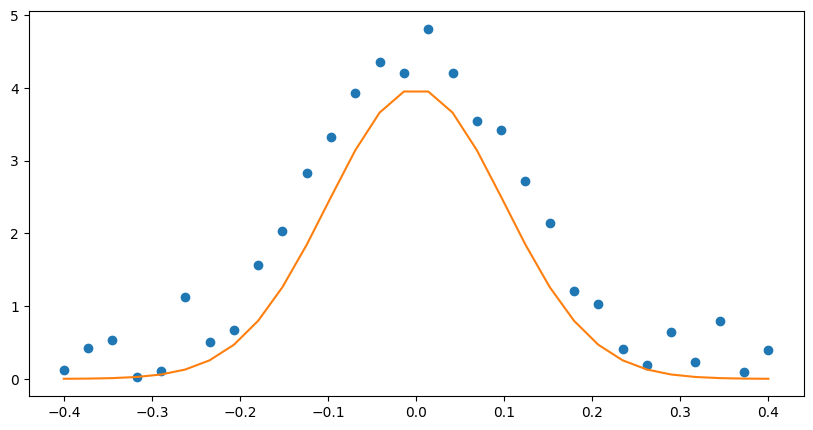

In [80]:
# Best parameters from visual inspection: mu = 0, sigma = 0.10
# Re-evaluate the function fit_gauss with those parameters
fit, sse = fit_gauss(x, noisy_y, [0,0.1], True)

# Plot the fit as a line and original noisy data as dots
plt.plot(x, noisy_y, 'o')
plt.plot(x, fit)
print(sse)

## Adding baseline parameter 
Since this data no longer starts at 0 on the y-axis, the original Gaussian equation fit doesn't work                                    
         
Adding baseline parameter to shift fit upward 

In [71]:
def fit_gauss_b(x, data, par, flag):
    # free parameters 
    mu    = par[0]
    sigma = par[1]
    b     = par[2]

    # objective function with baseline parameter
    fit = (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))) + b

    # cost function 
    cost = sum(data-fit)**2
    if flag==True:
        return [fit, cost]
    else:
        return cost

## New grid search with baseline parameter

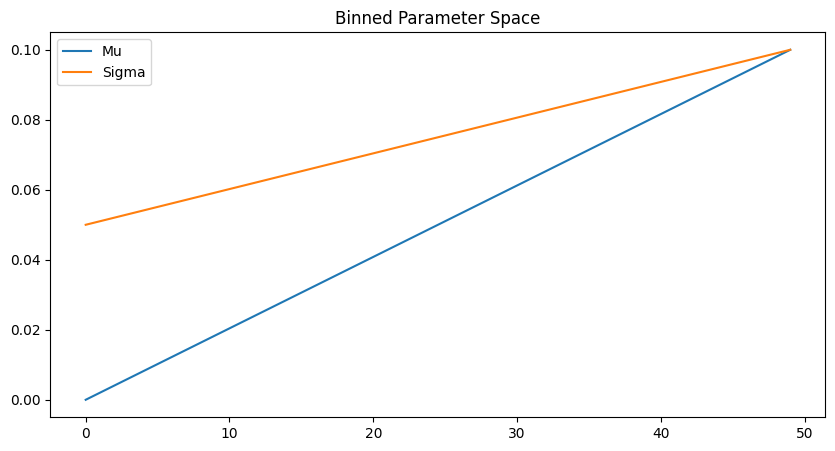

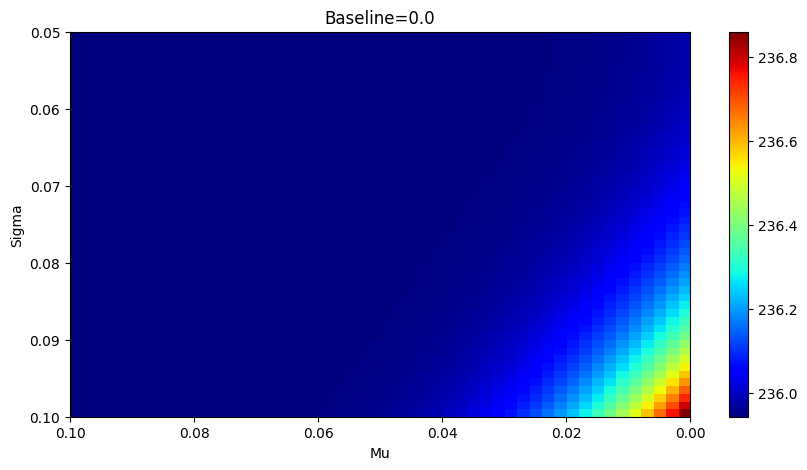

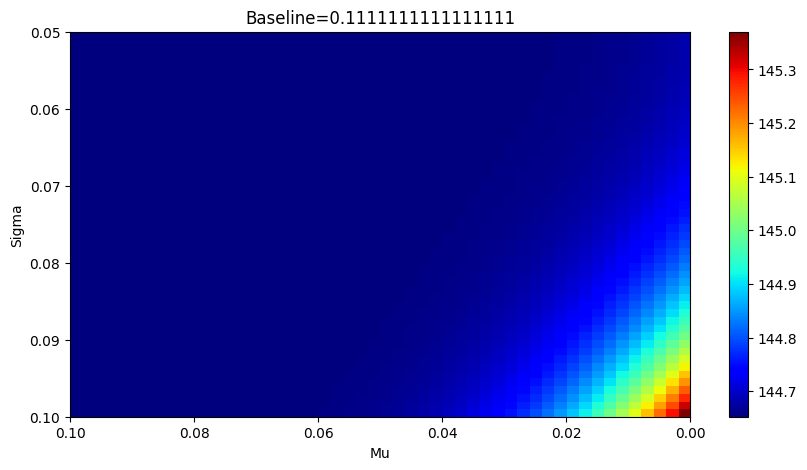

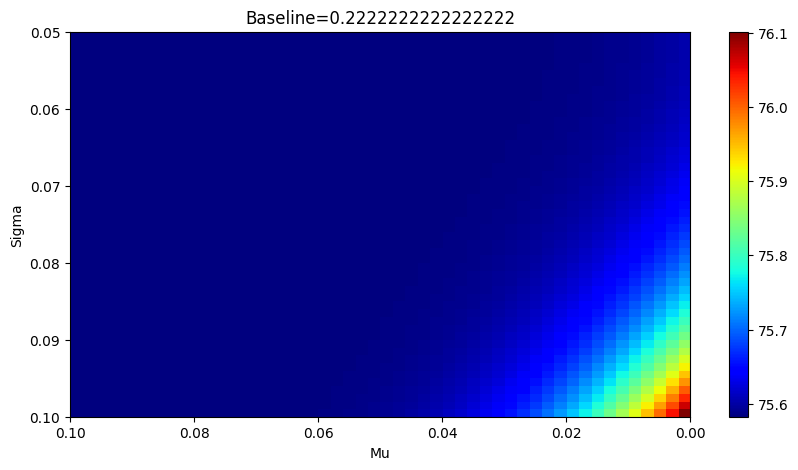

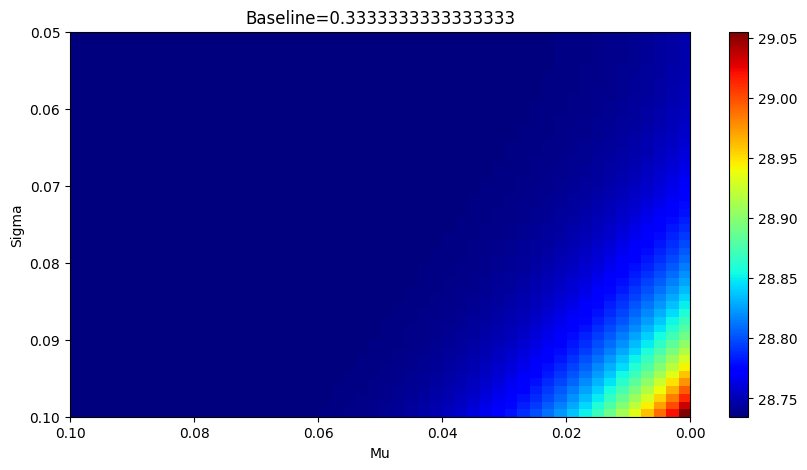

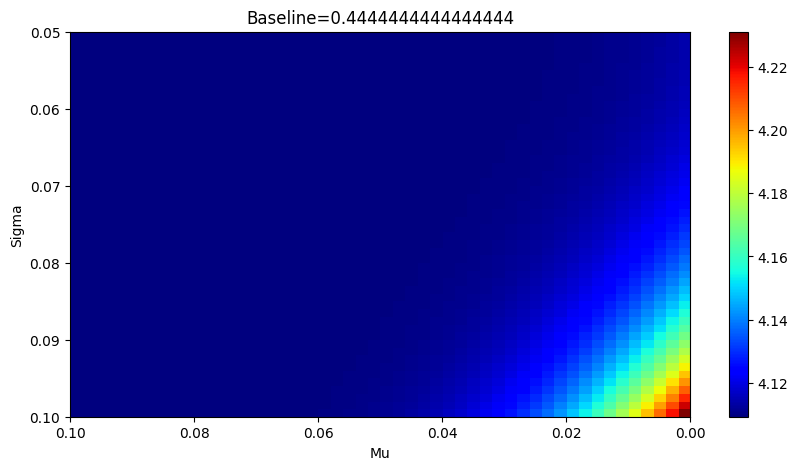

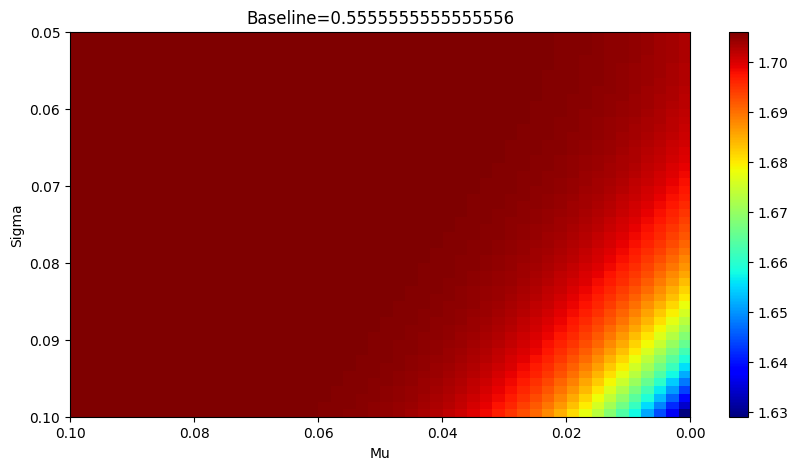

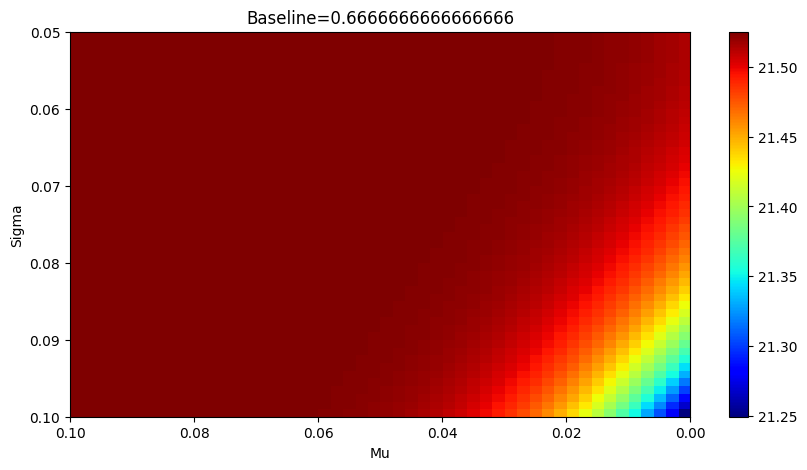

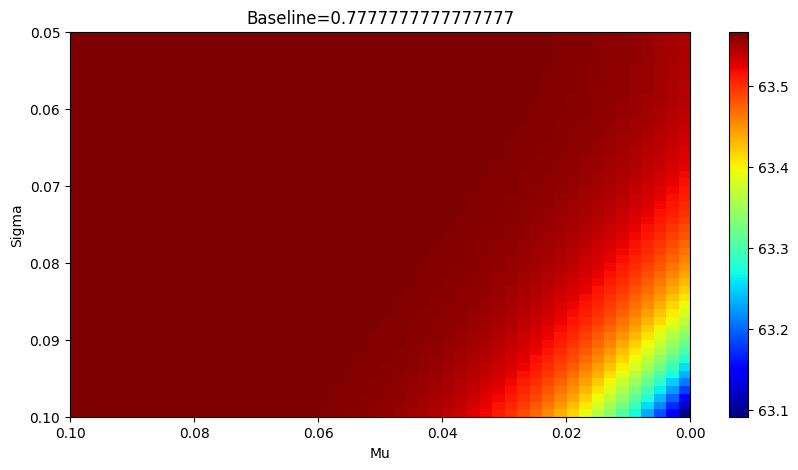

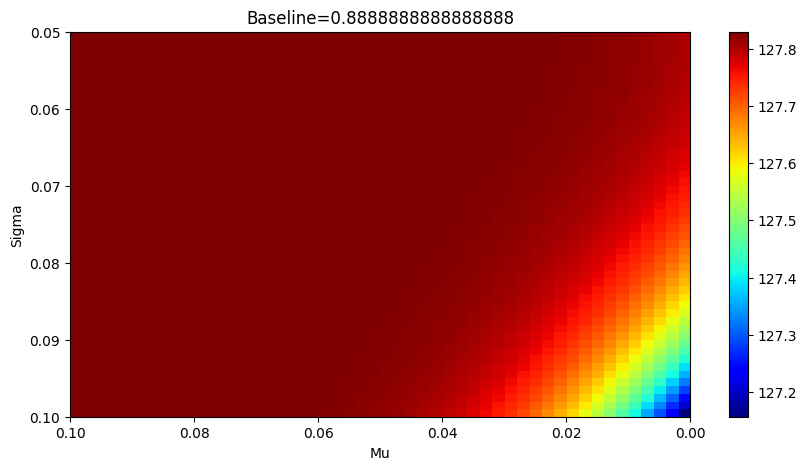

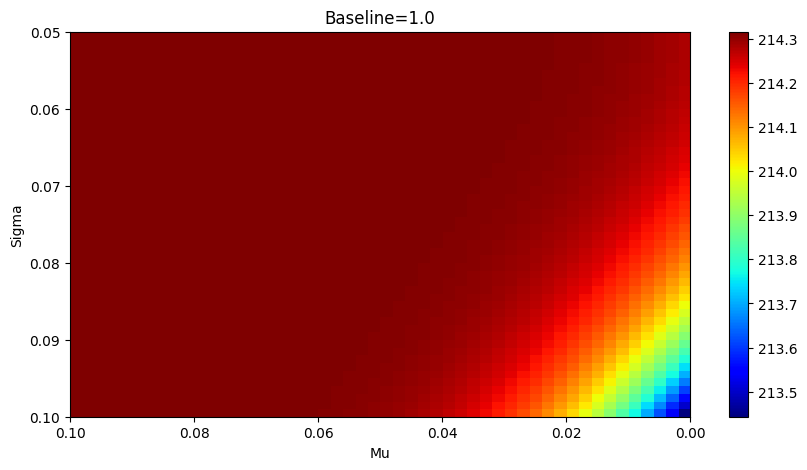

In [73]:
# Define parameters to be tested 
mu = np.linspace(0, 0.1, 50)
sigma = np.linspace(0.05, 0.1, 50)
b = np.linspace(0,1,10)

# Plot parameter space
plt.plot(mu, label='Mu')
plt.plot(sigma, label="Sigma")
plt.legend()
plt.title('Binned Parameter Space')

# Get cost for each parameter combination 
for xx in range(len(b)):
    baseline = b[xx]
    for ii in range(len(mu)):
        m = mu[ii]
        for jj in range(len(sigma)):
            s = sigma[jj]
            costs[ii,jj] = (fit_gauss_b(x, data=noisy_y, par=[m,s,baseline], flag=False))

    # Plot error grids 
    plt.figure()
    plt.imshow(costs,cmap='jet',aspect='auto',extent=[0.1,0,0.1,0.05])
    plt.colorbar()
    plt.xlabel('Mu')
    plt.ylabel('Sigma')
    plt.title('Baseline='+str(baseline))


## Fit data with new baseline function

0.13081238496372036


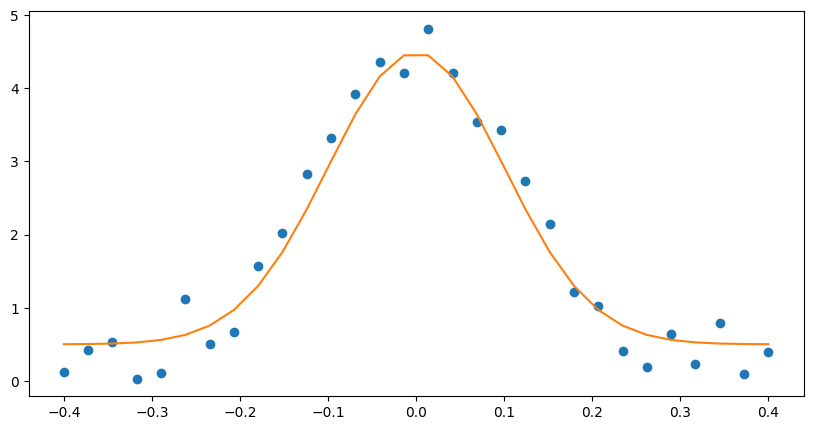

In [74]:
# Best parameters from visual inspection: mu = 0, sigma = 0.10, b = 0.5
# Re-evaluate the function fit_gauss with those parameters
fit, sse = fit_gauss_b(x, noisy_y, [0,0.1, 0.5], True)

# Plot the fit as a line and original noisy data as dots
plt.plot(x, noisy_y, 'o')
plt.plot(x, fit)
print(sse)

## 6. Validate your results using grid search with *scipy.optimize.minimize*
now call the same objective function but rather than you finding the best parameters with the error grid, instead use *scipy.optimize.minimize* 

1.0023356408483514e-06


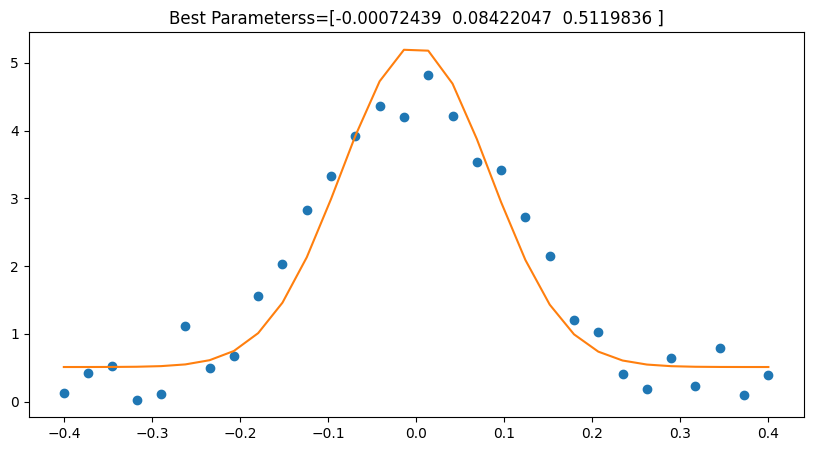

In [77]:
# Fitting
bnds = ((-0.2,0.2),(-0.2,0.2),(0,1)) # bounds for each parameter: m, s, b
start = (0,0.1,0.4) # starting points 

x_vals = x
data = noisy_y
fun = lambda par: fit_gauss_b(x_vals, data, par, flag=False)
res = minimize(fun, x0=start, method='Nelder-Mead', bounds=bnds) # optimized parameters 
fit, sse = fit_gauss_b(x_vals, data, res.x, flag=True) 

# Plot the fit and original noisy data 
plt.plot(x,data,'o')
plt.plot(x,fit)
plt.title('Best Parameterss='+str(res.x))
print(sse)

## Add another parameter to control amplitude (gain)

In [78]:
def fit_gauss_bg(x, data, par, flag):

    # free parameters: mu, sigma, baseline, g 
    mu = par[0]
    sigma = par[1]
    b = par[2]
    g = par[3]
    
    # objective function with baseline and g 
    fit = g*(np.exp( - (x - mu)**2 / (2 * sigma**2)))+b
    
    #cost function  
    cost = sum(data - fit) **2
    if flag == True:
        return [fit, cost]
    else:
        return cost

## Fit data with new baseline+g function

2.575941822877373e-09


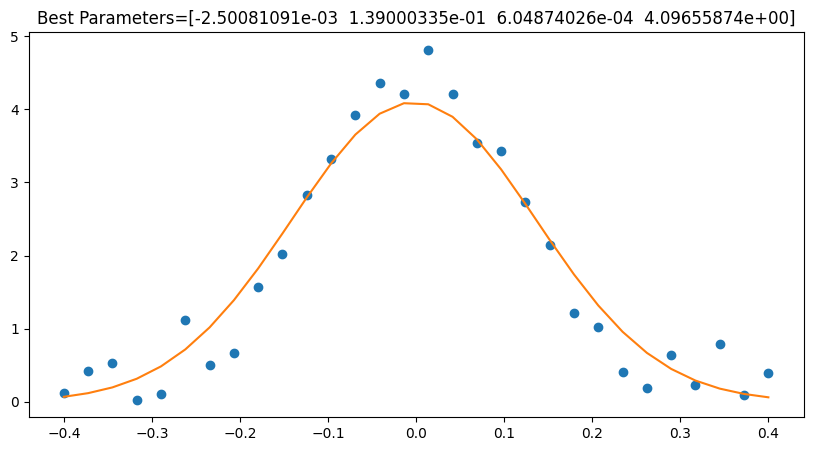

In [79]:
# Fitting 
bnds = ((-0.2,0.2),(-0.2,0.2),(0,1),(0,6)) # bounds for each parameter: mu,sigma,b,g 
start = (0,0.1,0,3) # starting points

x_vals = x
data = noisy_y
fun = lambda par: fit_gauss_bg(x_vals, data, par, flag=False)
res = minimize(fun, x0=start, method='Nelder-Mead', bounds=bnds)
fit,sse = fit_gauss_bg(x_vals, data, res.x, flag=True) 

# Plot the fit and original noisy data 
plt.plot(x,data,'o')
plt.plot(x,fit)
plt.title('Best Parameters='+str(res.x))
print(sse)